In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt
data = open('/tmp/sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

--2019-08-30 15:01:36--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2019-08-30 15:01:36 (137 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [12]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 10, 100)           321100    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 10, 300)           301200    
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 300)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 1605)              162105    
_________________________________________________________________
dense_3 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
____________________________________________

In [13]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
15462/15462 [==============================] - 41s 3ms/sample - loss: 6.9136 - acc: 0.0217
Epoch 2/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 6.4978 - acc: 0.0233
Epoch 3/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 6.3927 - acc: 0.0235
Epoch 4/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 6.2671 - acc: 0.0301
Epoch 5/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 6.1713 - acc: 0.0360
Epoch 6/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 6.0876 - acc: 0.0394
Epoch 7/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 6.0052 - acc: 0.0418
Epoch 8/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 5.9140 - acc: 0.0455
Epoch 9/100
15462/15462 [==============================] - 40s 3ms/sample - loss: 5.8136 - acc: 0.0550
Epoch 10/100
15462/15462 [==============================] - 40s 3ms/sampl

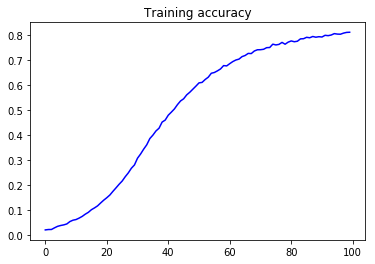

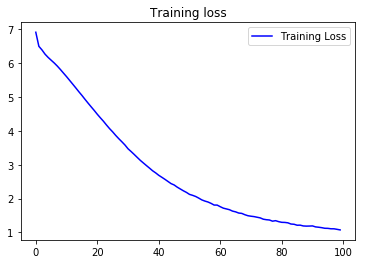

In [16]:
import matplotlib.pyplot as plt
acc = history.history['acc']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [15]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope or hell to approve so dearly forth thee doth drink arising taken behind sight eyed fix'd must make walls to smother grow days find go back live swearing thence seen trust groan with prove eye twain twain twain twain new ill used shown live could so gone so foes green thine best swearing green true glory find give worth show trust joy thee bright o'er green it date tender summer of thence bear behind days back weep back behind with groan lies fix'd be seen leap friend still shine bright know in me not half me one groan still be
